In [8]:
import pypylon.pylon as py
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [9]:
tlf = py.TlFactory.GetInstance()

In [10]:
tlf

<pypylon.pylon.TlFactory; proxy of <Swig Object of type 'Pylon::CTlFactory *' at 0x7f40d952f720> >

In [11]:
devices = tlf.EnumerateDevices()

In [12]:
print (len(devices))

1


In [17]:
for d in devices:
    print(d.GetModelName(), d.GetSerialNumber(), d.GetFriendlyName(), d.GetUserDefinedName())

daA1920-30uc 23841227 Narrow (23841227) Narrow


In [7]:
cam = py.InstantCamera(tlf.CreateDevice(devices[0]))

In [8]:
cam = py.InstantCamera(tlf.CreateFirstDevice())

In [9]:
cam.Open()

In [25]:
cam.Gain.Value
cam.ExposureTime.Value

38215.0

In [11]:
cam.Gain.SetValue(12.1)

In [12]:
cam.TriggerSelector.Value

'FrameStart'

In [13]:
cam.UserSetSelector = 'Default'
cam.UserSetLoad.Execute()

In [14]:
cam.PixelFormat.Symbolics

('RGB8', 'YCbCr422_8', 'BayerGB8', 'BayerGB12')

In [15]:
cam.PixelFormat.GetValue()

'YCbCr422_8'

In [16]:
# cam.PixelFormat = "YCbCr422_8"
cam.PixelFormat = 'RGB8'

In [17]:
res = cam.GrabOne(1000)

In [18]:
res.GetBuffer()[:100]

bytearray(b'\x1b\x1c\x14\x1c\x19\x16\x1b\x14\x19\x1b\x12\x1b\x1a\x0e\x1d\x18\x12\x1d\x18\x15\x1c\x18\x14\x1e\x1a\x12\x1f\x1c\x12\x1f\x19\x12 \x15\x13\x1f\x15\x15\x1e\x11\x10\x1d\x15\x16 \x13\x15!\x0f\x14"\x0b\x13"\x0c\x11"\x10\x12\x1f\x0f\x16\x1b\x0e\x16\x1c\x13\x16\x1c\x17\x12\x1f\x1c\x11!\x1c\x10\x1c\x1e\x17\x1e\x19\x16\x1b\x18\x16\x19\x18\x12\x1b\x15\x11\x1e\x13\x13\x1e\x11\x14\x1e\x0e')

In [20]:
img = res.GetArray()

In [21]:
img.shape
print(type(img[0][0][0]))

<class 'numpy.uint8'>


-1

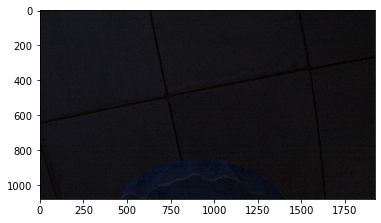

In [22]:
plt.imshow(img)
cv2.imshow("aa",img)
cv2.waitKey(0)

In [26]:
converter = py.ImageFormatConverter()
converter.OutputPixelFormat = py.PixelType_RGB8packed
converter.OutputBitAlignment = "MsbAligned"

In [ ]:
cam.PixelFormat = 'YCbCr422_8'
img = cam.GrabOne(1000)
img = converter.Convert(img)
frame = img.GetArray()
print(type(frame[0][0][0]))
plt.imshow(frame)
cv2.imshow("aa",frame)
cv2.waitKey(0)

Error: Session cannot generate requests

In [46]:
cam.PixelFormat.Value

'YCbCr422_8'

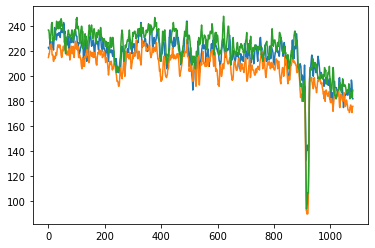

In [83]:
plt.plot(img[:,1000])

In [ ]:
cam.Close()

In [ ]:
cam.IsGrabbing()

Error: Session cannot generate requests